In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/Users/zoezhu/Downloads/churn_data.csv')

In [3]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [5]:
df.describe(include='all')

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


### Data Cleaning

In [6]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [7]:
# No missing data
df.isnull().sum()

CustomerID                0
Age                       0
Location                  0
Device                    0
Month_1_Spend             0
Month_1_Items             0
Month_1_Support_Calls     0
Month_2_Spend             0
Month_2_Items             0
Month_2_Support_Calls     0
Month_3_Spend             0
Month_3_Items             0
Month_3_Support_Calls     0
Month_4_Spend             0
Month_4_Items             0
Month_4_Support_Calls     0
Month_5_Spend             0
Month_5_Items             0
Month_5_Support_Calls     0
Month_6_Spend             0
Month_6_Items             0
Month_6_Support_Calls     0
Month_7_Spend             0
Month_7_Items             0
Month_7_Support_Calls     0
Month_8_Spend             0
Month_8_Items             0
Month_8_Support_Calls     0
Month_9_Spend             0
Month_9_Items             0
Month_9_Support_Calls     0
Month_10_Spend            0
Month_10_Items            0
Month_10_Support_Calls    0
Month_11_Spend            0
Month_11_Items      

In [8]:
df.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Location                10000 non-null  object 
 3   Device                  10000 non-null  object 
 4   Month_1_Spend           10000 non-null  float64
 5   Month_1_Items           10000 non-null  int64  
 6   Month_1_Support_Calls   10000 non-null  int64  
 7   Month_2_Spend           10000 non-null  float64
 8   Month_2_Items           10000 non-null  int64  
 9   Month_2_Support_Calls   10000 non-null  int64  
 10  Month_3_Spend           10000 non-null  float64
 11  Month_3_Items           10000 non-null  int64  
 12  Month_3_Support_Calls   10000 non-null  int64  
 13  Month_4_Spend           10000 non-null  float64
 14  Month_4_Items           10000 non-null 

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
#Convert the Location column to a categorical variable
df['Location'].astype('category')

0                  US
1                  US
2              Canada
3                  US
4                  US
            ...      
9995    Great Britain
9996    Great Britain
9997               US
9998        Australia
9999           Canada
Name: Location, Length: 10000, dtype: category
Categories (4, object): ['Australia', 'Canada', 'Great Britain', 'US']

In [12]:
# Convert the 'Device' column to a categorical variable
df['Device'].astype('category')

0           iOS
1           iOS
2       Android
3           iOS
4           iOS
         ...   
9995        iOS
9996        iOS
9997        iOS
9998        iOS
9999        iOS
Name: Device, Length: 10000, dtype: category
Categories (2, object): ['Android', 'iOS']

In [13]:
# univariate analysis of the data
df.groupby('Location').count()

,CustomerID,Age,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Location,,,,,,,,,,,,,,,,,,,,,
Australia,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
Canada,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258,...,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258
Great Britain,762,762,762,762,762,762,762,762,762,762,...,762,762,762,762,762,762,762,762,762,762
US,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,...,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255


In [14]:
df.groupby('Device').count()

,CustomerID,Age,Location,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Device,,,,,,,,,,,,,,,,,,,,,
Android,5736,5736,5736,5736,5736,5736,5736,5736,5736,5736,...,5736,5736,5736,5736,5736,5736,5736,5736,5736,5736
iOS,4264,4264,4264,4264,4264,4264,4264,4264,4264,4264,...,4264,4264,4264,4264,4264,4264,4264,4264,4264,4264


In [15]:
df.groupby('Location')[['Age','Month_1_Spend','Month_1_Items','Month_1_Support_Calls']].mean()

,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls
Location,,,,
Australia,45.859310,473.208450,61.005517,2.506207
Canada,42.259512,480.394274,65.225458,2.480977
Great Britain,45.620735,468.353506,63.644357,2.543307
US,42.075911,488.943134,64.893302,2.483901


In [16]:
df.groupby('Location')[['Age','Month_2_Spend','Month_2_Items','Month_2_Support_Calls']].mean()

,Age,Month_2_Spend,Month_2_Items,Month_2_Support_Calls
Location,,,,
Australia,45.859310,449.328198,61.096552,2.586207
Canada,42.259512,473.967244,63.487318,2.543448
Great Britain,45.620735,485.187588,59.762467,2.397638
US,42.075911,481.631673,63.693772,2.501058


In [17]:
df.groupby('Location')[['Age','Month_3_Spend','Month_3_Items','Month_3_Support_Calls']].mean()

,Age,Month_3_Spend,Month_3_Items,Month_3_Support_Calls
Location,,,,
Australia,45.859310,460.495328,62.435862,2.491034
Canada,42.259512,480.643626,63.177313,2.551433
Great Britain,45.620735,467.104107,63.893701,2.593176
US,42.075911,489.607554,62.456874,2.468860


In [18]:
import pandas as pd
# create a sample DataFrame with categorical columns
df2 = pd.DataFrame({'Location': ['Australia', 'Canada', 'Great Britain', 'US']})
# create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df2, columns=['Location'])

# print the resulting DataFrame
print(df_dummies)


   Location_Australia  Location_Canada  Location_Great Britain  Location_US
0                   1                0                       0            0
1                   0                1                       0            0
2                   0                0                       1            0
3                   0                0                       0            1


In [19]:
location_dummies = pd.get_dummies(df['Location'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Location                10000 non-null  object 
 3   Device                  10000 non-null  object 
 4   Month_1_Spend           10000 non-null  float64
 5   Month_1_Items           10000 non-null  int64  
 6   Month_1_Support_Calls   10000 non-null  int64  
 7   Month_2_Spend           10000 non-null  float64
 8   Month_2_Items           10000 non-null  int64  
 9   Month_2_Support_Calls   10000 non-null  int64  
 10  Month_3_Spend           10000 non-null  float64
 11  Month_3_Items           10000 non-null  int64  
 12  Month_3_Support_Calls   10000 non-null  int64  
 13  Month_4_Spend           10000 non-null  float64
 14  Month_4_Items           10000 non-null 

#### The Median is the middle value,which is less sensistive to outliers than mean, casue it not effected by extreme values.


In [21]:
# use boxlot to compare the distribution of Month_1_Spend between churn and non-churn customers
sns.boxplot(x='Month_1_Spend', y='location_dummies', data=df)

ValueError: Could not interpret input 'location_dummies'

<Axes: xlabel='Churn', ylabel='Month_6_Spend'>

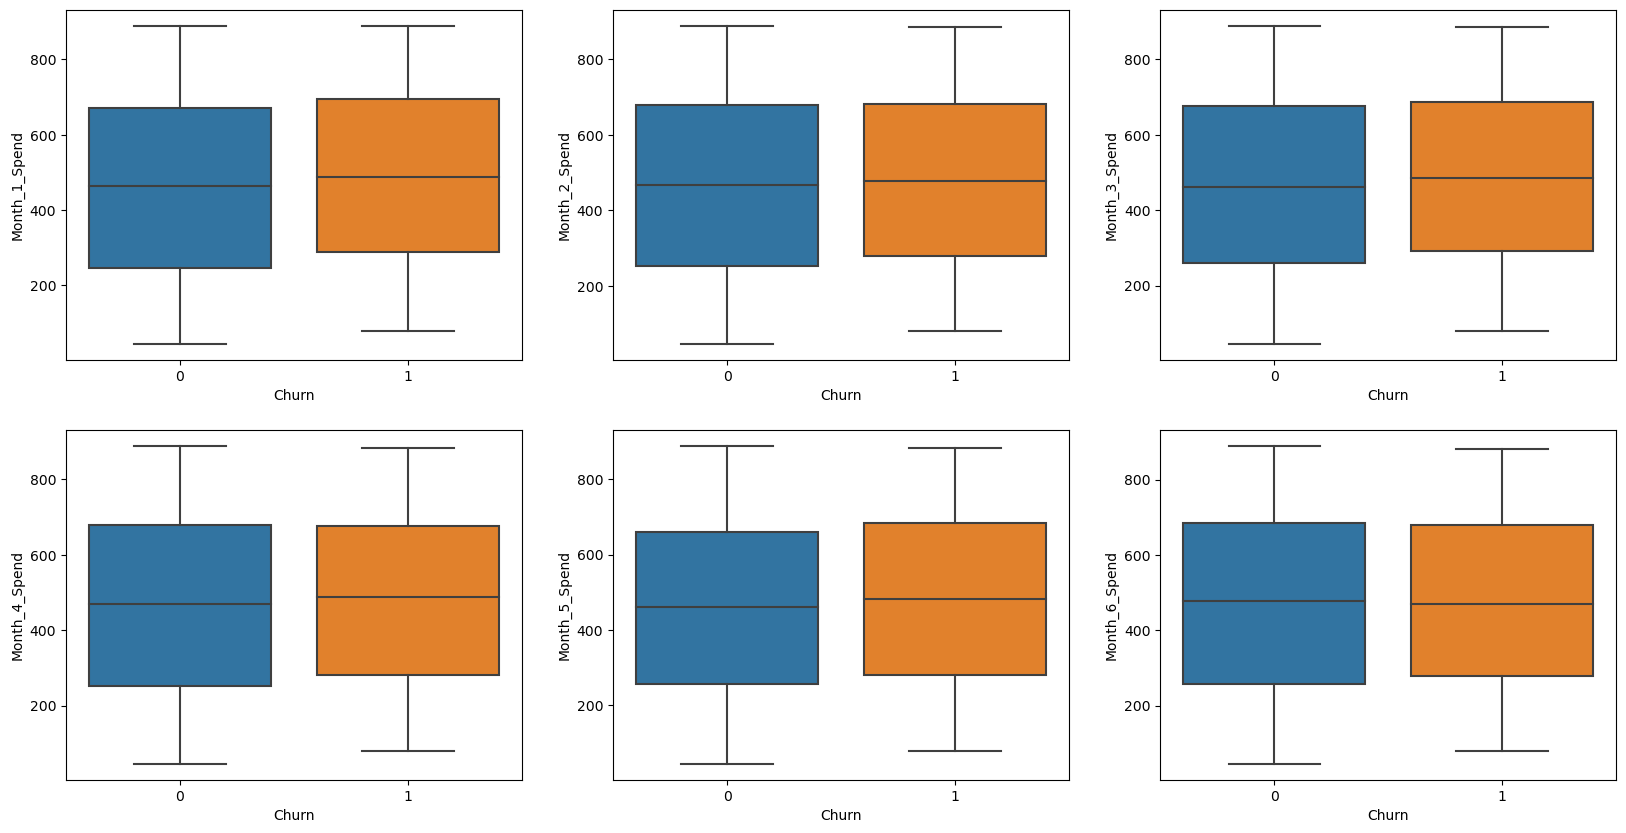

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Churn', y='Month_1_Spend', ax=ax1, data=df)
sns.boxplot(x='Churn', y='Month_2_Spend', ax=ax2, data=df)
sns.boxplot(x='Churn', y='Month_3_Spend', ax=ax3, data=df)
sns.boxplot(x='Churn', y='Month_4_Spend', ax=ax4, data=df)
sns.boxplot(x='Churn', y='Month_5_Spend', ax=ax5, data=df)
sns.boxplot(x='Churn', y='Month_6_Spend', ax=ax6, data=df)

   CustomerID  Age Location   Device  Month_1_Spend  Month_1_Items  \
0           1   46       US      iOS     756.005761             39   
1           2   52       US      iOS     594.838157             59   
2           3   43   Canada  Android     453.217405             21   
3           4   41       US      iOS     621.453170             95   
4           5   41       US      iOS     660.735119             48   

   Month_1_Support_Calls  Month_2_Spend  Month_2_Items  Month_2_Support_Calls  \
0                      2     582.023075             92                      2   
1                      0     251.269898             33                      2   
2                      3     124.178946             92                      0   
3                      1     134.362559             46                      5   
4                      5     713.265527             54                      2   

   ...  Month_10_Spend  Month_10_Items  Month_10_Support_Calls  \
0  ...      280.397827    

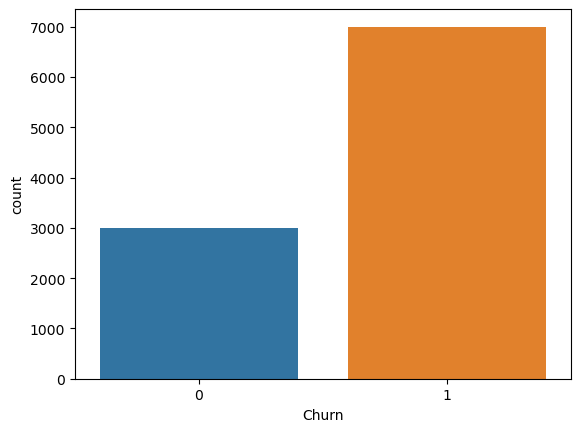

KeyboardInterrupt: 

In [ ]:
# Print the first few rows of the dataframe
print(df.head())

# Display the distribution of 'Churn'
sns.countplot(x='Churn', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='Churn')
plt.show()


<Axes: xlabel='Churn', ylabel='Count'>

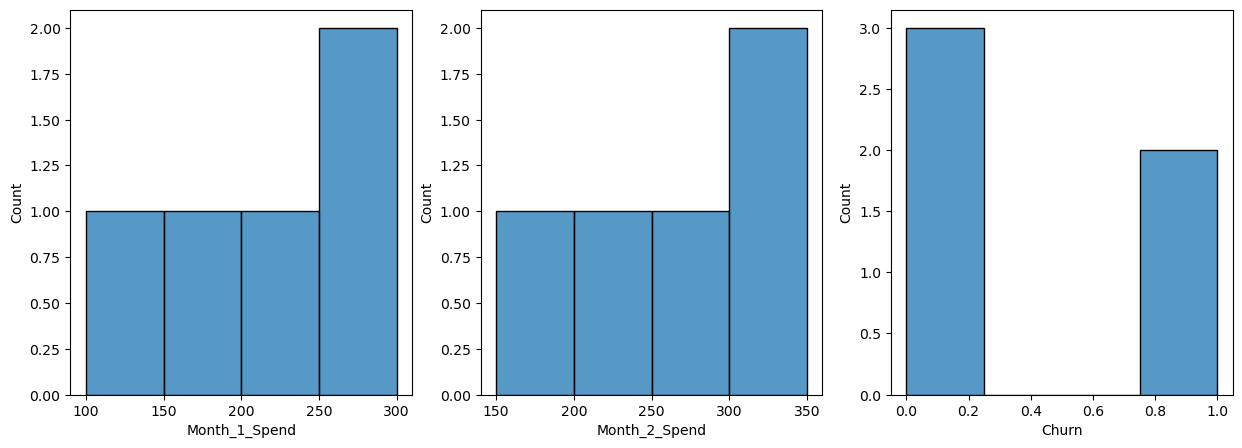

In [ ]:
# check continuous variables first > age, work experience, family size

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_1_Spend'], ax=ax1)
sns.histplot(df['Month_2_Spend'], ax=ax2)
sns.histplot(df['Churn'], ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_3_Spend'>

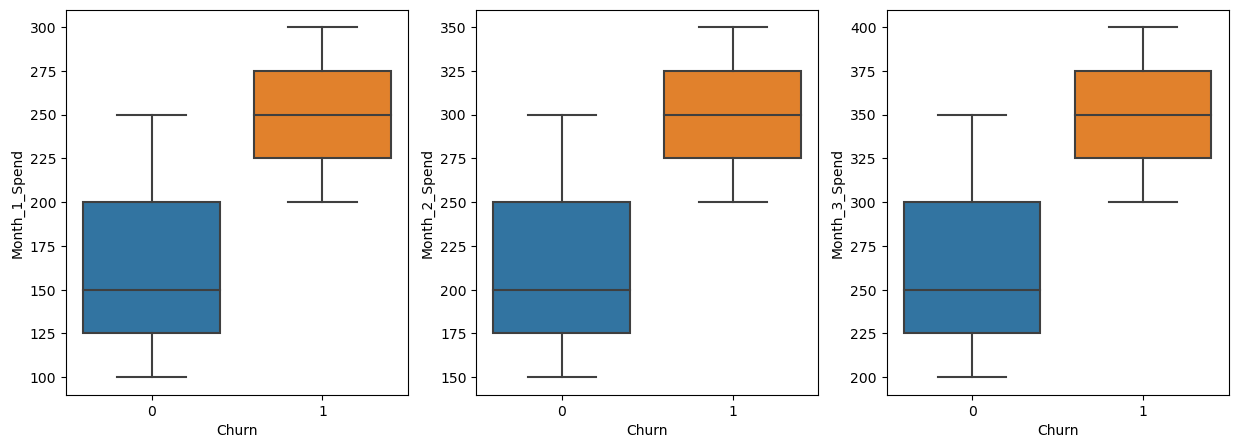

In [ ]:
# check continuous variables 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_1_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_2_Spend',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_3_Spend', data=df, ax=ax3)

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Location                10000 non-null  object 
 3   Device                  10000 non-null  object 
 4   Month_1_Spend           10000 non-null  float64
 5   Month_1_Items           10000 non-null  int64  
 6   Month_1_Support_Calls   10000 non-null  int64  
 7   Month_2_Spend           10000 non-null  float64
 8   Month_2_Items           10000 non-null  int64  
 9   Month_2_Support_Calls   10000 non-null  int64  
 10  Month_3_Spend           10000 non-null  float64
 11  Month_3_Items           10000 non-null  int64  
 12  Month_3_Support_Calls   10000 non-null  int64  
 13  Month_4_Spend           10000 non-null  float64
 14  Month_4_Items           10000 non-null 

In [ ]:
df_spend = df.groupby(['Churn','Month_1_Spend'])[['Age']].count().unstack()
df_spend['Churn'] = df_spend['Age'][0] + df_spend['Age'][1]
df_spend['percent_0'] = df_spend['Age'][0] / df_spend['Churn']
df_spend['percent_1'] = df_spend['Age'][1] / df_spend['Churn']
df_spend

KeyError: 0

In [22]:
# refined hypothesis> 1. Spend more money, less likely to churn
log = LogisticRegression()
log.fit(df[[
       'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls']], df['Churn'])

/Users/zoezhu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred = log.predict(df[['Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls']])

In [24]:
print(accuracy_score(pred,df['Churn'])) 
print(f1_score(pred,df['Churn']))
print(precision_score(pred,df['Churn']))
print(recall_score(pred,df['Churn']))

0.7252
0.8287850467289721
0.9501428571428572
0.7349171270718232


The accuracy_score is 0.7252,which means the model is good to predicted the calss of 72.52% of samples.
The f1_score is a weighted average of the precision and recall.
Precision_score is the proportion of true positives among all positive predictions.
recall_score is actual positive results.

In [25]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,Month_1_Spend,0.000618
1,Month_1_Items,0.005032
2,Month_1_Support_Calls,0.000935
3,Month_2_Spend,0.000354
4,Month_2_Items,0.00505
5,Month_2_Support_Calls,0.035375
6,Month_3_Spend,0.000535
7,Month_3_Items,0.000908
8,Month_3_Support_Calls,0.017699
9,Month_4_Spend,0.000454


In [26]:
x = df[['Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls']]
y = df['Churn']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [28]:
from sklearn.svm import SVC

In [29]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC()

In [30]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

/Users/zoezhu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [31]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [32]:
print(f1_score(pred_knn,y_test)) #Good model for this data,cause it over 0.5
print(f1_score(pred_log,y_test)) # Good model for this data,cause it over 0.5
print(f1_score(pred_nb,y_test)) # little bit higher than normal model,may cause overfitting
print(f1_score(pred_sv,y_test)) # Good model for this data,cause it over 0.5


0.7955321129382563
0.8352466645982005
0.8711111111111112
0.8331388564760793


In [33]:
pred_sv

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
# Narrow down modeling to SVC and LogReg
# Finding best params for SVC
params_svc = {'kernel':['rbf', 'linear', 'poly','sigmoid']}

# use RandomizedSearchCV to find best params,a way of hyperparameter tuning(for finding best model, and optimizebthe model)
randomsearch_svc = RandomizedSearchCV(svc, params_svc, cv=10, n_iter= 15, scoring='f1')
randomsearch_svc.fit(x_train,y_train)

/Users/zoezhu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [35]:
randomsearch_svc.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [36]:
log_pred_prob = log.predict_proba(x_test)

In [37]:
fpr, tpr, tresholds = roc_curve(y_test,log_pred_prob[:,1])

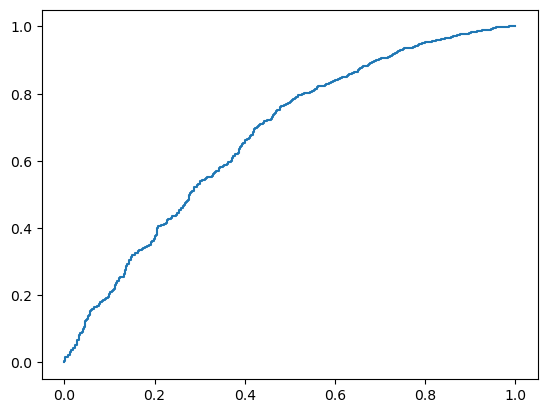

In [38]:
plt.plot(fpr,tpr)

In [39]:
# gmeans is the geometric mean of the sensitivity and specificity
gmeans = np.sqrt(tpr*(1-fpr))

In [40]:
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.666494044665517
0.6340250138316222


In [41]:
tresholds

array([1.94062645, 0.94062645, 0.92233029, 0.92055413, 0.91099802,
       0.90772088, 0.9065785 , 0.90521032, 0.90471496, 0.90387473,
       0.90205197, 0.90040895, 0.89761404, 0.89753896, 0.8912867 ,
       0.89101125, 0.89091587, 0.89088682, 0.88736029, 0.88627772,
       0.88423375, 0.88380722, 0.88349305, 0.88236125, 0.87853341,
       0.87821825, 0.87711073, 0.87658142, 0.87022429, 0.86986704,
       0.86981686, 0.86796594, 0.86290719, 0.86265439, 0.86056543,
       0.85979707, 0.85910637, 0.85902975, 0.85843021, 0.8577216 ,
       0.85377184, 0.85376111, 0.85318183, 0.8529997 , 0.85132058,
       0.85116964, 0.844559  , 0.84438377, 0.84419747, 0.84416265,
       0.84341418, 0.843336  , 0.84142073, 0.84138798, 0.83936092,
       0.83909205, 0.83817545, 0.83750016, 0.83550864, 0.8349624 ,
       0.83366839, 0.83360051, 0.83322134, 0.83320717, 0.83227746,
       0.83210434, 0.83182735, 0.83165028, 0.83046788, 0.83036661,
       0.83027551, 0.82945499, 0.82891421, 0.82874249, 0.82836

In [42]:
gmeans

array([0.        , 0.02646281, 0.070014  , 0.06995278, 0.12952737,
       0.12930033, 0.1319666 , 0.13185058, 0.13446174, 0.13434332,
       0.14430788, 0.14418057, 0.15121785, 0.15108421, 0.17642835,
       0.17627215, 0.17821996, 0.1780619 , 0.19470335, 0.19435721,
       0.20468416, 0.20450165, 0.2078271 , 0.20764145, 0.21730431,
       0.21710985, 0.22331424, 0.22291367, 0.25295263, 0.25272506,
       0.25406578, 0.25360759, 0.27902902, 0.27877662, 0.2894798 ,
       0.28921747, 0.29038133, 0.2901177 , 0.29472304, 0.29445498,
       0.30784607, 0.30756557, 0.30973921, 0.30945647, 0.3179948 ,
       0.317704  , 0.34299717, 0.34268293, 0.34365508, 0.34333965,
       0.34623709, 0.34591871, 0.35069023, 0.35036716, 0.36246837,
       0.36213384, 0.3639582 , 0.36362167, 0.37348743, 0.37314145,
       0.37840959, 0.3780584 , 0.38152689, 0.38117215, 0.38545994,
       0.38510087, 0.38764842, 0.38728664, 0.39065441, 0.39028914,
       0.39112578, 0.39039264, 0.39288719, 0.39251776, 0.39334

In [43]:
y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.36829385617577914:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [44]:
print(f1_score(y_pred_new,y_test))

0.8365781710914454


In [45]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

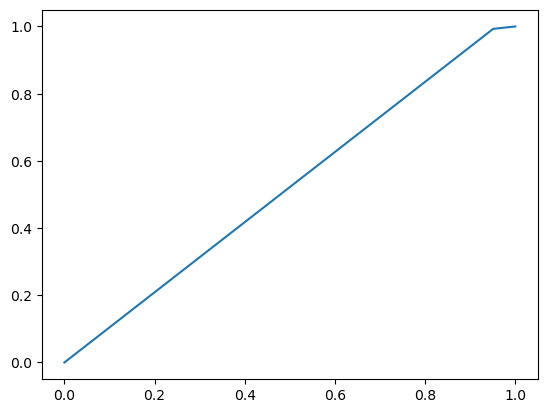

In [46]:
plt.plot(fpr,tpr)

In [48]:
df.iloc[:,21]

0       0
1       1
2       4
3       0
4       3
       ..
9995    4
9996    3
9997    1
9998    3
9999    5
Name: Month_6_Support_Calls, Length: 10000, dtype: int64

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [52]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(np.array(df.iloc[:,:21]), np.array(df.iloc[:,21]))

ValueError: could not convert string to float: 'US'

In [54]:
print(accuracy_score(pred, df.iloc[:,21]))

0.1686


In [56]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(np.array(df.iloc[:,:21]), np.array(df.iloc[:,21]))
pred = knn.predict(np.array(df.iloc[:,:21]))

ValueError: could not convert string to float: 'US'

In [57]:
print(accuracy_score(pred, df.iloc[:,21]))
print(f1_score(pred, df.iloc[:,21]))
print(recall_score(pred, df.iloc[:,21]))
print(precision_score(pred,df.iloc[:,21]))

0.1686


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [58]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:,:21]), np.array(df.iloc[:,21]), test_size=0.2, random_state=123)

In [60]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

ValueError: could not convert string to float: 'US'

In [61]:
# predict the test data
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

NameError: name 'pred_l' is not defined

In [63]:
svc_best = SVC(kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=72)

svc_best.fit(X_train,y_train)
knn_best.fit(X_train,y_train)

pred_svc_best = svc_best.predict(X_test)
pred_knn_best = knn_best.predict(X_test)

print(f1_score(pred_svc_best, y_test))
print(f1_score(pred_knn_best, y_test))

ValueError: could not convert string to float: 'US'

In [64]:
print(f1_score(pred_l, y_test))


NameError: name 'pred_l' is not defined

- Month spend, month items, and location these factors can help predict whether customers will be churn, Month Support Calls.
- knn model will be the good model to fit the business question,cause it predict result show that is good value
- Knn can be used to build recommender systems that suggest product to users based on their sililarity to others.
-Also, Knn can be used to calssify images based on their similarit with other dataset.
